In [285]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from config import RAW_DATA_DIR

# Show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Show full width
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 0)

### Shelter System Flow

In [286]:
sys_flow = pd.read_csv(RAW_DATA_DIR / "toronto-shelter-system-flow.csv")
sys_flow.head()

,_id,date(mmm-yy),population_group,returned_from_housing,returned_to_shelter,newly_identified,moved_to_housing,became_inactive,actively_homeless,ageunder16,age16-24,age25-34,age35-44,age45-54,age55-64,age65over,gender_male,gender_female,"gender_transgender,non-binary_or_two_spirit",population_group_percentage
0,1,Jan-18,All Population,46,494,1106,508,862,7958,1233,1111,1341,1560,1318,973,422,4963,2912,83,100.0%
1,2,Jan-18,Chronic,11,29,317,111,111,2532,223,346,313,403,505,495,247,1632,870,30,31.8%
2,3,Jan-18,Refugees,4,32,651,328,75,2408,914,241,414,547,204,66,22,1219,1177,12,30.3%
3,4,Jan-18,Families,0,14,561,321,57,2277,1232,187,276,411,130,23,18,968,1308,1,28.6%
4,5,Jan-18,Youth,12,64,116,44,116,924,0,924,0,0,0,0,0,571,312,41,11.6%


In [287]:
sys_flow.isna().sum()

_id                                            0
date(mmm-yy)                                   0
population_group                               0
returned_from_housing                          0
returned_to_shelter                            0
newly_identified                               0
moved_to_housing                               0
became_inactive                                0
actively_homeless                              0
ageunder16                                     0
age16-24                                       0
age25-34                                       0
age35-44                                       0
age45-54                                       0
age55-64                                       0
age65over                                      0
gender_male                                    0
gender_female                                  0
gender_transgender,non-binary_or_two_spirit    0
population_group_percentage                    0
dtype: int64

<Figure size 1200x700 with 0 Axes>

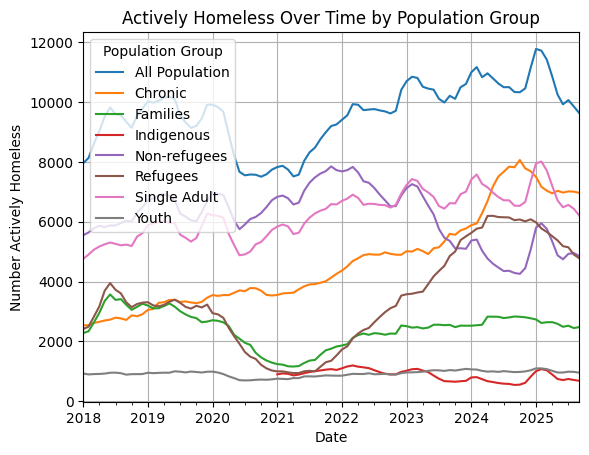

In [288]:
sys_flow["date(mmm-yy)"] = pd.to_datetime(sys_flow["date(mmm-yy)"], format="%b-%y")
pivot_df = sys_flow.pivot(
    index="date(mmm-yy)", columns="population_group", values="actively_homeless"
)
pivot_df = pivot_df.sort_index()

plt.figure(figsize=(12, 7))
pivot_df.plot(kind="line")

plt.title("Actively Homeless Over Time by Population Group")
plt.xlabel("Date")
plt.ylabel("Number Actively Homeless")
plt.legend(title="Population Group")
plt.grid()
plt.show()

### Shelter Locations (City Hostel Serviced)

In [289]:
xls_path = RAW_DATA_DIR / "shelter-locations-readme.xls"

xls = pd.ExcelFile(xls_path, engine="xlrd")
print(xls.sheet_names)  # See which sheets exist

df = pd.read_excel(
    xls_path,
    engine="xlrd",
    header=1,  # Real headers start on the second row
    usecols="A:C",  # Item name, Description, Datatype cols
)

df = df.dropna(how="all").reset_index(drop=True)
df.columns = ["ITEM_NAME", "DESCRIPTION", "DATATYPE"]
df = df.drop(0)
df

['Sheet1', 'Sheet2', 'Sheet3']


,ITEM_NAME,DESCRIPTION,DATATYPE
1,FID,Feature ID,Numeric
2,SHAPE,Feature type e.g. point,NaN
3,ADDRESS_PO,Unique geographical Address Identifier,Numeric
4,ADDRESS_FU,Full municipal address,NaN
5,POSTAL_COD,Postal code,NaN
6,MUNICIPALI,Former city municipality,NaN
7,CITY,Toronto,NaN
8,CENTRELINE,The unique geographic identifier of the street segment the address is on,Numeric
9,OBJECTID,Object identifier,Numeric
10,WARD,Toronto Electoral Ward name and number,NaN


In [290]:
import geopandas as gpd

shelter_locations_df = gpd.read_file(RAW_DATA_DIR / "shelters_wgs84.shp")
shelter_locations_df.to_csv(RAW_DATA_DIR / "shelter_wgs8.csv")

shelter_locations_df.head(5)

,ADDRESS_PO,ADDRESS_FU,POSTAL_COD,MUNICIPALI,CITY,CENTRELINE,OBJECTID,WARD,NEIGHBOURH,NEIGHBOU_1,COMMUNITY_,CONFIDENTI,MOTEL,CAPACITY,NAME,TYPE,TYPE2,CITY_OP,geometry
0,808260,70 Gerrard St E,M5B1G6,former TORONTO,Toronto,1143800,44,Toronto Centre-Rosedale (27),75,Church-Yonge Corridor,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,38,St. Vincent De Paul - Mary's Home,Single,Single Women,None,POINT (-79.37841 43.66015)
1,9531684,3410 Bayview Ave,M2M3S3,NORTH YORK,Toronto,9531674,45,Willowdale (24),50,Newtonbrook East,NORTH YORK COMMUNITY COUNCIL,N,None,30,St. Vincent De Paul - St. Clare's Residence,Single,Single Women,None,POINT (-79.39544 43.79811)
2,2591634,87 Pembroke St,M5A2N9,former TORONTO,Toronto,14020526,46,Toronto Centre-Rosedale (27),73,Moss Park,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,33,Street Haven at the Crossroads,Single,Single Women,None,POINT (-79.37243 43.65924)
3,8067796,129 Peter St,M5V2H3,former TORONTO,Toronto,20139637,47,Trinity-Spadina (20),77,Waterfront Communities-The Islands,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,VARIES,Streets to Homes Assessment & Referral Centre,Single,Mixed Adult,Y,POINT (-79.39324 43.64875)
4,6362877,191 Spadina Rd,M5R2T9,former TORONTO,Toronto,6362837,48,Trinity-Spadina (20),95,Annex,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,24,Toronto Community Hostel,Family,Family,None,POINT (-79.40628 43.67362)


In [291]:
shelter_locations_df.isna().sum()

ADDRESS_PO     0
ADDRESS_FU     0
POSTAL_COD     1
MUNICIPALI     0
CITY           0
CENTRELINE     0
OBJECTID       0
WARD           0
NEIGHBOURH     0
NEIGHBOU_1     0
COMMUNITY_     0
CONFIDENTI     0
MOTEL         55
CAPACITY       0
NAME           0
TYPE           0
TYPE2          0
CITY_OP       45
geometry       0
dtype: int64

['Single Women' 'Mixed Adult' 'Family' 'Youth' 'Single Men']


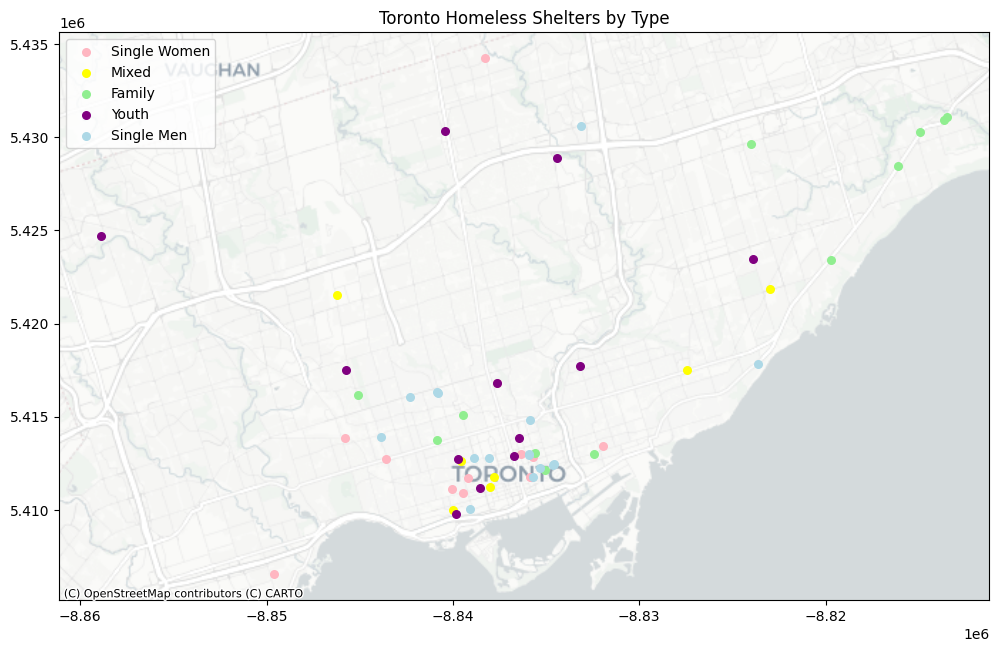

In [302]:
import contextily as cx

shelters_webmer = shelter_locations_df.to_crs(epsg=3857)

print(shelter_locations_df["TYPE2"].unique())

shelter_locations_single_wom = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Single Women"
]
shelter_locations_mixed = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Mixed Adult"
]
shelter_locations_family = shelters_webmer[shelter_locations_df["TYPE2"] == "Family"]
shelter_locations_youth = shelters_webmer[shelter_locations_df["TYPE2"] == "Youth"]
shelter_locations_single_men = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Single Men"
]

fig, ax = plt.subplots(figsize=(12, 10))

shelter_locations_single_wom.plot(
    ax=ax, color="lightpink", markersize=30, label="Single Women"
)
shelter_locations_mixed.plot(ax=ax, color="yellow", markersize=30, label="Mixed")
shelter_locations_family.plot(ax=ax, color="lightgreen", markersize=30, label="Family")
shelter_locations_youth.plot(ax=ax, color="purple", markersize=30, label="Youth")
shelter_locations_single_men.plot(
    ax=ax, color="lightblue", markersize=30, label="Single Men"
)

cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)

plt.title("Toronto Homeless Shelters by Type")
#plt.axis("off")
plt.legend()
plt.show()

### Daily Shelter & Overnight Service Occupancy & Capacity

In [293]:
daily_occ_cap_df = pd.read_csv(
    RAW_DATA_DIR / "daily-shelter-overnight-service-occupancy-capacity-2024.csv"
)

daily_occ_cap_df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,LOCATION_CITY,LOCATION_PROVINCE,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16892,COSTI - Hotel Program - Dixon (Refugee Families),Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,650,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,149.0,150.0,149.0,0.0,1.0,NaN,100.0
1,2,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16891,COSTI - Hotel Program - Dixon (Refugee Singles),Mixed Adult,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,113,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,57.0,57.0,57.0,0.0,0.0,NaN,100.0
2,3,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051.0,COSTI Reception Centre,100 Lippincott St,M5S 2P1,Toronto,ON,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Program - Refugee,8,Bed Based Capacity,8.0,8.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
3,4,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114.0,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,North York,ON,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Programs,203,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,67.0,83.0,67.0,0.0,16.0,NaN,100.0
4,5,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114.0,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,North York,ON,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,508,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,161.0,148.0,161.0,0.0,0.0,NaN,100.0


In [294]:
daily_occ_cap_df.shape

(48794, 32)

In [295]:
daily_occ_cap_df.isna().sum()

_id                           0
OCCUPANCY_DATE                0
ORGANIZATION_ID               0
ORGANIZATION_NAME             0
SHELTER_ID                    0
SHELTER_GROUP                 0
LOCATION_ID                   5
LOCATION_NAME               371
LOCATION_ADDRESS           2192
LOCATION_POSTAL_CODE       2166
LOCATION_CITY              2181
LOCATION_PROVINCE          2181
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       14028
CAPACITY_FUNDING_BED      14028
OCCUPIED_BEDS             14028
UNOCCUPIED_BEDS           14028
UNAVAILABLE_BEDS          14028
CAPACITY_ACTUAL_ROOM      34766
CAPACITY_FUNDING_ROOM     34766
OCCUPIED_ROOMS            34766
UNOCCUPIED_ROOMS          34766
UNAVAILABLE_ROOMS         34766
OCCUPANCY_RATE_BEDS       14028
OCCUPANC

In [296]:
num_shelter_daily_occ_cap = daily_occ_cap_df["LOCATION_ADDRESS"].nunique()
num_shelter_locations = shelter_locations_df["NAME"].nunique()

print(f"There are a total of {num_shelter_daily_occ_cap} shelters in the daily occ + cap dataset")
print(f"There are a total of {num_shelter_locations} shelters in the shelter location dataset")

num_programs = daily_occ_cap_df["PROGRAM_NAME"].nunique()
actual_programs = daily_occ_cap_df["PROGRAM_NAME"].unique()
print(f"There are a total of {num_programs} programs")

num_sectors = daily_occ_cap_df["SECTOR"].nunique()
actual_sectors = daily_occ_cap_df["SECTOR"].unique()
print(f"There are a total of {num_sectors}: {actual_sectors}")

There are a total of 105 shelters in the daily occ + cap dataset
There are a total of 59 shelters in the shelter location dataset
There are a total of 157 programs
There are a total of 5: ['Families' 'Mixed Adult' 'Men' 'Women' 'Youth']


In [297]:
for sector in actual_sectors:
    num_locations = daily_occ_cap_df[daily_occ_cap_df['SECTOR'] == sector]['LOCATION_ID'].nunique()
    print(f"There are {num_locations} shelters for the {sector} sector")

There are 15 shelters for the Families sector
There are 40 shelters for the Mixed Adult sector
There are 27 shelters for the Men sector
There are 23 shelters for the Women sector
There are 19 shelters for the Youth sector


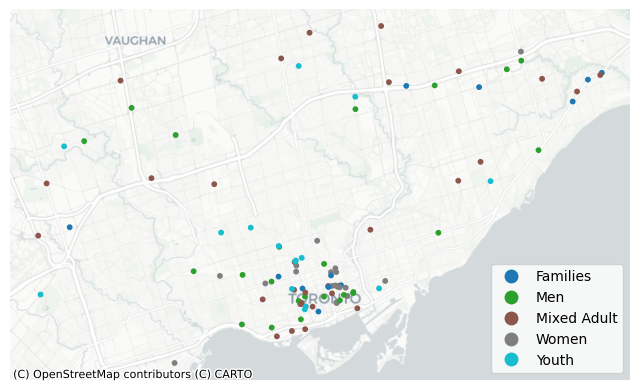

In [303]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

from geopandas.tools import geocode

daily_occ_cap_df["FULL_ADDRESS"] = (
    daily_occ_cap_df["LOCATION_ADDRESS"].fillna("").str.strip()
    + ", "
    + daily_occ_cap_df["LOCATION_CITY"].fillna("").str.strip()
    + ", "
    + daily_occ_cap_df["LOCATION_PROVINCE"].fillna("").str.strip()
    + ", Canada"
)

daily_occ_cap_filtered_df = daily_occ_cap_df[[
    "FULL_ADDRESS",
    "PROGRAM_AREA",
    "SECTOR"
]]

unique_addrs = (
    daily_occ_cap_filtered_df
    .dropna(subset=["FULL_ADDRESS"])
    .drop_duplicates(subset=["FULL_ADDRESS"])
    .reset_index(drop=True)
)

unique_addrs = unique_addrs.drop([19, 104])

gdf_geo = geocode(unique_addrs['FULL_ADDRESS'], provider="nominatim", user_agent="geo_example", timeout=10)

gdf = gpd.GeoDataFrame(
    pd.concat([unique_addrs.reset_index(drop=True), gdf_geo[['geometry']]], axis=1),
    geometry='geometry',
    crs='EPSG:4326'
)

gdf_3857 = gdf.to_crs(epsg=3857)

ax = gdf_3857.plot(figsize=(8, 8), markersize=10, column="SECTOR", legend=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)  
ax.set_axis_off()
plt.show()

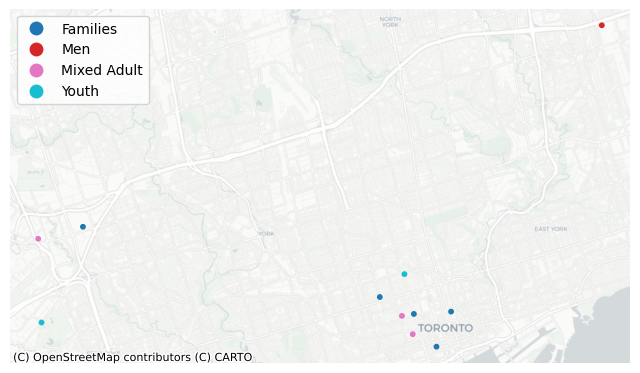

In [308]:
refugee_shelters_df = gdf_3857[
    (gdf_3857["PROGRAM_AREA"] == "Temporary Refugee Response")
    | (gdf_3857["PROGRAM_AREA"] == "Base Program - Refugee")
]

ax = refugee_shelters_df.plot(figsize=(8, 8), markersize=10, column="SECTOR", legend=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)  
ax.set_axis_off()
plt.show()

### Scoping: refugee, toronto, bed based